IMPORTING ALL THE LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from textblob import TextBlob
import nltk
import spacy
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer



DATA VISUALISATION AND UNDERSTANDING

In [ ]:
file_path="/content/Instruments_Reviews.csv"
data=pd.read_csv(file_path)

In [ ]:
print("First 5 rows:")
print(data.head())
print("\nDataset Info:")
print(data.info())

First 5 rows:
       reviewerID        asin  \
0  A2IBPI20UZIR0U  1384719342   
1  A14VAT5EAX3D9S  1384719342   
2  A195EZSQDW3E21  1384719342   
3  A2C00NNG1ZQQG2  1384719342   
4   A94QU4C90B1AX  1384719342   

                                       reviewerName   helpful  \
0  cassandra tu "Yeah, well, that's just like, u...    [0, 0]   
1                                              Jake  [13, 14]   
2                     Rick Bennette "Rick Bennette"    [1, 1]   
3                         RustyBill "Sunday Rocker"    [0, 0]   
4                                     SEAN MASLANKA    [0, 0]   

                                          reviewText  overall  \
0  Not much to write about here, but it does exac...      5.0   
1  The product does exactly as it should and is q...      5.0   
2  The primary job of this device is to block the...      5.0   
3  Nice windscreen protects my MXL mic and preven...      5.0   
4  This pop filter is great. It looks and perform...      5.0   

     

In [ ]:
data.isnull().sum()

,0
reviewerID,0
asin,0
reviewerName,6
helpful,0
reviewText,0
overall,1
summary,1
unixReviewTime,1
reviewTime,1


In [ ]:
data.dropna(subset=['reviewText'])

def get_sentiment(rating):
  if(rating>=4):
    return 'positive'
  elif(rating==3):
    return 'neutral'
  else:
    return 'negative'

data['sentiment']=data['overall'].apply(get_sentiment)
print(data['sentiment'].value_counts())


sentiment
positive    1764
neutral      137
negative      63
Name: count, dtype: int64


In [ ]:
data.duplicated().sum()

0

In [ ]:
nltk.download('stopwords')
stop_words=set(stopwords.words('english'))

nlp = spacy.load('en_core_web_sm')

ps = PorterStemmer()

def preprocess_text(text):
  text=text.lower()
  text = re.sub(r'<[^>]*>', '', text)
  text = re.sub(r'http\S+|www.\S+', '', text)
  text = text.translate(str.maketrans('', '', string.punctuation))
  text_tokens=text.split()
  text_tokens=[word for word in text_tokens if word not in stop_words]
  doc=nlp(' '.join(text_tokens))
  tokens=[token.text for token in doc]
  stemmed_tokens=[ps.stem(word) for word in tokens]

  return ' '.join(stemmed_tokens)




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
data.isnull().sum()

,0
reviewerID,0
asin,0
reviewerName,6
helpful,0
reviewText,0
overall,1
summary,1
unixReviewTime,1
reviewTime,1
sentiment,0


In [ ]:
data = data.dropna(subset=['reviewText'])
data.isnull().sum()

,0
reviewerID,0
asin,0
reviewerName,6
helpful,0
reviewText,0
overall,1
summary,1
unixReviewTime,1
reviewTime,1
sentiment,0


In [ ]:
pip install swifter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 20.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.2/243.2 kB 18.4 MB/s eta 0:00:00
  Created wheel for swifter: filename=swifter-1.4.0-py3-none-any.whl size=16507 sha256=a4f8e53a90b26cac325b3c5e891d7f3ee7b18c25c2dc0391a095535d6fb5af09
  Stored in directory: /root/.cache/pip/wheels/e4/cf/51/0904952972ee2c7aa3709437065278dc534ec1b8d2ad41b443
Successfully built swifter


In [ ]:
import swifter

data['processed_text']=data['reviewText'].swifter.apply(preprocess_text)
print("Sample of Processed Text:")
print(data[['reviewText', 'processed_text']].head())



Pandas Apply:   0%|          | 0/1964 [00:00<?, ?it/s]

Sample of Processed Text:
                                          reviewText  \
0  Not much to write about here, but it does exac...   
1  The product does exactly as it should and is q...   
2  The primary job of this device is to block the...   
3  Nice windscreen protects my MXL mic and preven...   
4  This pop filter is great. It looks and perform...   

                                      processed_text  
0  much write exactli suppos filter pop sound rec...  
1  product exactli quit affordablei realiz doubl ...  
2  primari job devic block breath would otherwis ...  
3  nice windscreen protect mxl mic prevent pop th...  
4  pop filter great look perform like studio filt...  


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer(max_features=5000)
X=tfidf.fit_transform(data['processed_text']).toarray()
print(f"TF-IDF feature matrix shape: {X.shape}")


TF-IDF feature matrix shape: (1964, 5000)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

label_encoder=LabelEncoder()
y=label_encoder.fit_transform(data['sentiment'])
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Test set shape: {X_test.shape}, {y_test.shape}")

Training set shape: (1571, 5000), (1571,)
Test set shape: (393, 5000), (393,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Accuracy: 0.8957
Classification Report:
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         7
     neutral       0.00      0.00      0.00        34
    positive       0.90      1.00      0.94       352

    accuracy                           0.90       393
   macro avg       0.30      0.33      0.31       393
weighted avg       0.80      0.90      0.85       393



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


As we can see, the model performs pretty good on positive review but very bad on neutral and negative classes, with 0 recall on the neutral. THis is because the data is very unbalanced

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))



Accuracy: 0.8499
Classification Report:
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         7
     neutral       0.21      0.12      0.15        34
    positive       0.91      0.94      0.92       352

    accuracy                           0.85       393
   macro avg       0.37      0.35      0.36       393
weighted avg       0.83      0.85      0.84       393



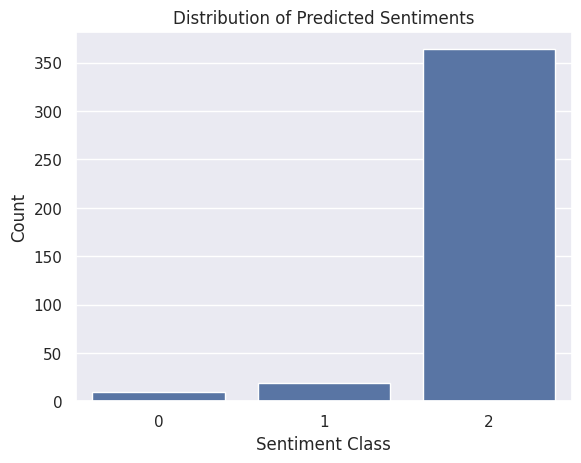

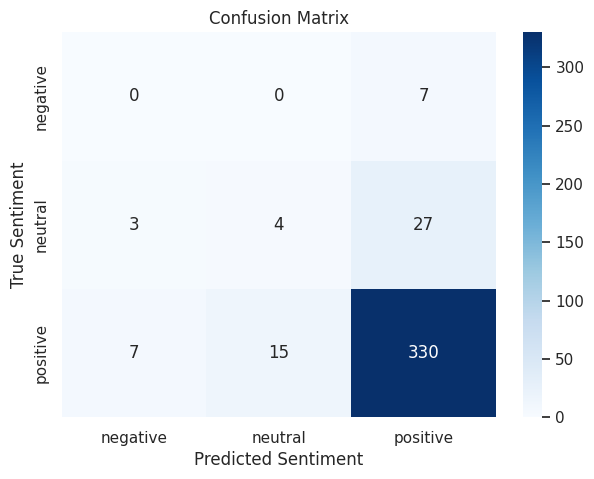

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Plot the distribution of predicted sentiment
sns.set(style="darkgrid")

# Plot a bar chart for the predicted classes
sns.countplot(x=y_pred)
plt.title("Distribution of Predicted Sentiments")
plt.xlabel("Sentiment Class")
plt.ylabel("Count")
plt.show()

# Confusion Matrix to visualize misclassifications
y_test_decoded = label_encoder.inverse_transform(y_test)
y_pred_decoded = label_encoder.inverse_transform(y_pred)

# Confusion Matrix to visualize misclassifications
conf_matrix = confusion_matrix(y_test_decoded, y_pred_decoded, labels=label_encoder.classes_)

# Plotting confusion matrix
plt.figure(figsize=(7,5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Sentiment")
plt.ylabel("True Sentiment")
plt.show()



INFERENCE

Performing good for positive reviews but messing up neutral and negative reviews due to class imbalance


